## Supervised Learning
## Project: Finding Donors for *CharityML*

----
## Exploring the Data


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration


In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]


# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income']=='<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data


### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  

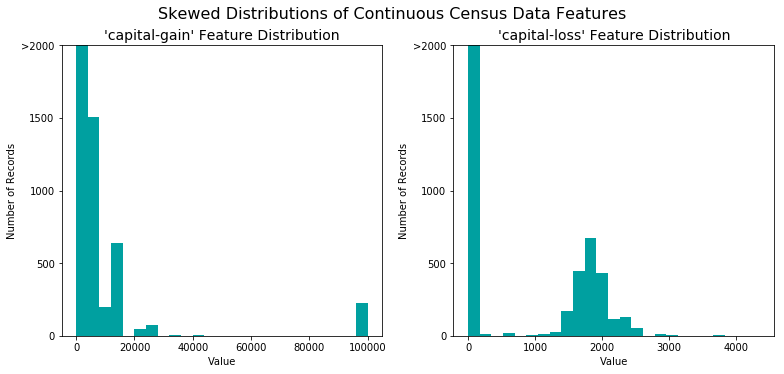

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

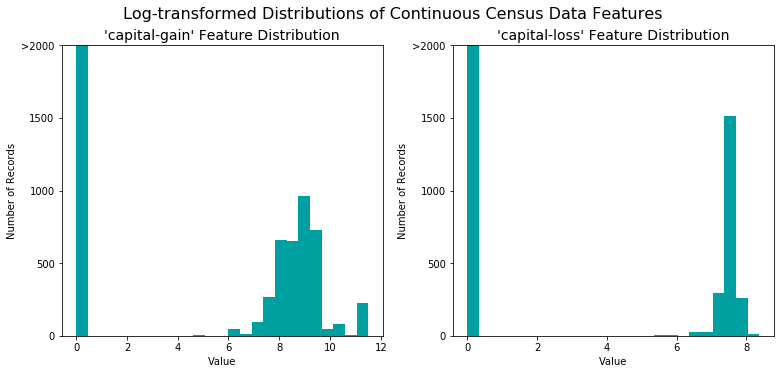

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features


In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed) #created new dataframe where our features are now scaled
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5)) #new dataframe is features_log_minmax_transform

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

In [7]:
features_log_minmax_transform.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [8]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform, 
prefix = ['workclass', 'education_level','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace(to_replace = ['<=50K','>50K'], value=[0,1], inplace=True)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
#data['income']
#features_final
income = data['income']

In [10]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(income)
FP = income.count() - TP

TN = 0
FN = 0 

# TODO: Calculate accuracy, precision and recall
accuracy = TP/(TP+FP+TN+FN)
recall = TP/(TP + FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta= 0.5
fscore = (1 + beta**2) * ((precision*recall)/((beta**2)* precision+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**
Models:
RandomForestClassifier
AdaBoostClassifier
DecisionTree
________________________

RandomForest:

1. The combination of this weak model with another weak model can create a strong model for industry use such as for reducing variance in the data. Maybe a company has too much data with outliers that do not benefit the outcome goal of a specific project. These ensemble method models can help narrow down the data. 

2. The strengths of this model is when we are not entirely sure which classification model to use we can default to picking a few of these ensemble methods that can together produce the best predictions. 

3. What are the weaknesses of the model? The weaknesses of randomforest is that they do not do well when used for regression and that they tend to overfit. This is probably because when in training, when the tree is split, that split is not the best for that feature but rather the subset of that split with randomized data. This then makes the classfication more broad and can lead to overfitting data.

4. This would make a good model for our problem because we are trying to find the best model that can predict the amount of people within a certain group (make more than 50k). We can also control the size and complexity of the random forest classifier. 

AdaBoost:

1. Adaboost is a model that works well in refining all values to the right prediciton as each prediction is sequencially to the one right before and weights are added to each value until a prediction with the least amount of error is reached. So, for industrial use this model can be used to make sharp predictions.

2. It's a model that does well by not overfitting the data. It works best when used for binary classification or decsion trees with one level. 

3. The model works better with classification problems but can be used for regression as well. AdaBoost is prone to producing low accuracy predictions if the output data is too noisy. So a dataset that is not cleaned well enough prior to being used can be problematic.

4. AdaBoost will be a great option as we are likely to use decision trees with our data which adaboost compliments. Since this method is sequencial and careful about choosig the next model based on pior error we won't have issues with multicollinearity within our data. 


Decision Trees:

1. Decision Trees can be used in the industry to learn about consumers. This is possible because the structure of a decision tree involves many 'if', 'then' cases leading to a particular truth or goal. This machine learning algorthim can be used to follow specific varying customer trends via customer input data (gender, age, like to '' or does not like to ''.. etc) and makes it possible to better understand the customers, which is the ultimate goal. 

2. This model performs best when there are more features fed into the model. It is able to make more accurate predictions with features that consist of true or false values. 

3. This model performs poorly when we don't have a wide range of values for each feature. The prediction accuracy of the model drops when we don't have too many cases for each feature. This is because there is a lot of bias in the model since it would need to group together features with significantly different values. They can easily overfit and are sensitive to slight changes to the testing data. Multicollinearity is also a problem that can occur when two features/variables explain the same thing. 

4. This would be a good model for our problem given that we have one hot encoded many of our features and there are many distinct features. In other words we will probably not have to worry about running into multicollinearity.

sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, 
https://machinelearningmastery.com/

**

In [12]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
   # income = training_labels
   # feature_final = training_features
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = abs(start - end)
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = abs(start - end)
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] =  accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average = 'weighted', beta = .5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average = 'weighted', beta = .5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

RandomForestClassifier trained on 36 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 36 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier trained on 36 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


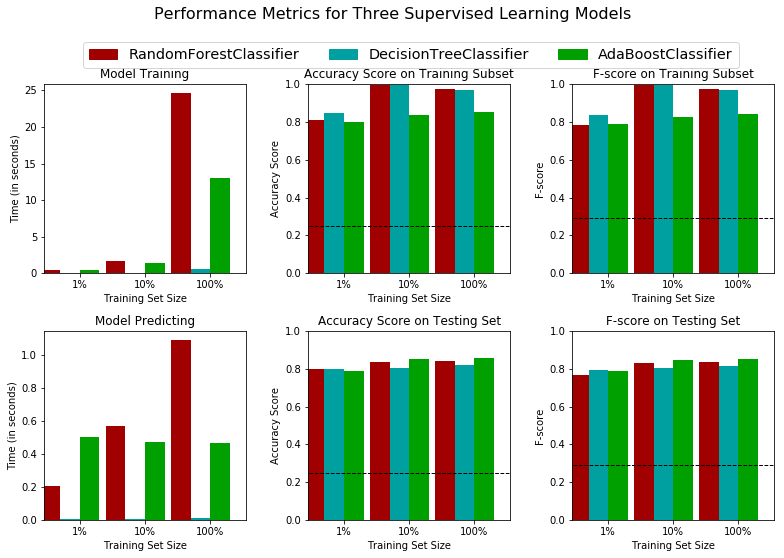

In [13]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = RandomForestClassifier(n_estimators=300, random_state=0)
clf_B = DecisionTreeClassifier()
clf_C = AdaBoostClassifier(n_estimators=300, learning_rate=0.2, random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * .10)
samples_1 = int(samples_10 * .01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

**


Based on the evaluation performed above, of the three models, I believe to be most appropriate for the task of identifying individuals that make more than 50k, would be AdaBoost. It's not the most efficient model as we can see in the model predicting graph abov, however it outshines the other models in other ways. For one, the model does a good job not to overfit/underfit the data as in the training set to test set there is little variation in the accuracy and F1 score. This is a good indicator that the model performed well in the training did not over or underfit the data.While the other models showed significant decrease in accuracy and f1 score from training to testing set. The model prediction time also increased from model training.



**

**Answer:
Adaboost works well with what are called other weak learning models. These are models that have an accuracy slightly above random guessing. Therefore we will always have an error rate that is less than 1/2. This is not ideal since we want a much lower error rate and so these weak learning models are combined with other weak learning models to make a better performing model. Adaboost for example will work well with one level decision trees. The this works is the two models create a "training model", kind of like a test run model and then build another model that picks up the errors of the first model. This cycle continues until the best model is obtained. This process or the 'model learning' is done by adjusting specific weights on botht he data points and classifiers of the initial model. This again, repeats sequentially for each iteration.



(more technical: 
Adaboost works well with weak learners like "stumps", or one level decision trees. Adaboost works by creating a training model (via the weak model) and then builds another model that picks up the errors of the first model to create a better model. This process continues until the best model is obtained or maximum models used (hyperparameter). This is done by adjusting the weights of the intial model (which "stumps" are more significant based on total error). The initial model's training set points are given weights 1/n, where n is the total training data. Then the miscalculation rate is applied to the model based on the prediction accuarcy of the model for the training set. Then the model is modified again using the weights.)
citations: https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/


** 

In [14]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=5)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate':[0.01, 0.001, 0.0001], 'n_estimators':[200, 500, 700]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8485
Final F-score on the testing data: 0.7153


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      85           |      84         |
| F-score        |      72           |      71         |


**Answer: My scores actually decreased from unoptimal to optimal. My F-score and accuracy are higher in my optimized model  than the naive predictor benchmarks I found earlier.**

**Answer: I believe that the most important would be capital loss since it directly relates to the question at hand, so I would rank number 1. Second would have to be capital gain since this also would influence how much money the person has. Third would have to be age, since usually when someone is older they accumulate more wealth than someone who has worked less years unless unusual case. Fourth would be education since this is an attibute associated with what career the person holds and ultimately how much money they make. The Fifth would be how many hours per week the person works since this also can influence the amount of money the person makes.**

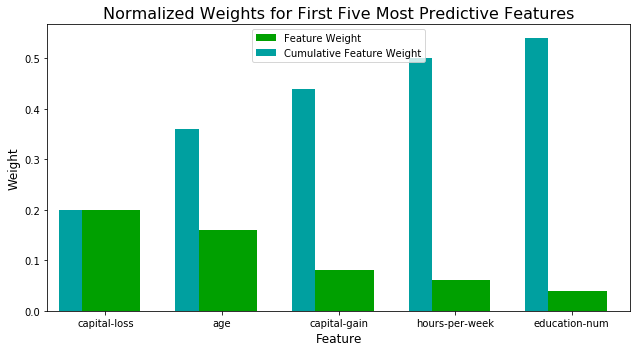

In [15]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

**Answer: I believe my predictions as to which features were the most important was somewhat accurate. I inaccurately ranked them. In the extraction of feature importance, capital gain came first, which I had ranked as second. Also I ranked hours worked 5th and education 4th, however in the feature importance extraction they ar swapped. My answers were close and the visualization confirms my thoughts in that capital gain and loss adn age are bigger weights than education or hours worked**

In [16]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8485
F-score on testing data: 0.7153

Final Model trained on reduced data
------
Accuracy on testing data: 0.8203
F-score on testing data: 0.6387


**Answer: The final model's F-score and accuracy on the reduced data are lower than the same scores when all features are being used. I would only consider using the reduced data if I also change the methods used. Otherwise I would not consider using the reduced data as my training set as the f1 score dropped so low.**

In [17]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 506626 bytes to finding_donors.html']